In [21]:
import os

import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d

In [15]:
base_folder = 'digitized/T2K_2019/efficiencies_vs_MN/'
filenames = os.listdir(base_folder)

In [16]:
datasets = {}
for filename in filenames:
    if '.csv' in filename:
        datasets[filename] = np.genfromtxt(base_folder+filename, delimiter=',')

Text(0, 0.5, 'efficiency')

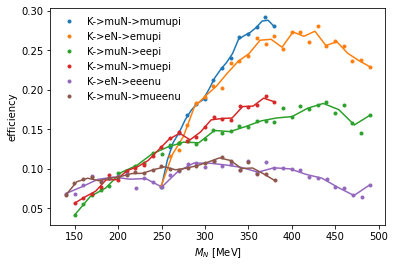

In [26]:
for i, (fn, data) in enumerate(datasets.items()):
    plt.plot(data[:,0], data[:, 1], '.', color=f'C{i}', label=fn.replace('.csv', '').replace('_', '->'))
    f = interp1d(data[:,0], data[:, 1], kind='slinear')
    plt.plot(np.linspace(data[0,0], data[-1,0], 20), f(np.linspace(data[0,0], data[-1,0], 20)), color=f'C{i}')
    
plt.legend(frameon=False)
plt.xlabel(r'$M_N$ [MeV]')
plt.ylabel('efficiency')

## Extrapolation 

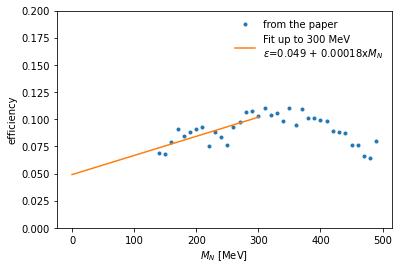

In [31]:
fn = 'K_eN_eeenu.csv'
this_dataset = datasets[fn]
mask = this_dataset[:, 0] < 300
poly = np.polynomial.polynomial.Polynomial.fit(this_dataset[:, 0][mask], this_dataset[:, 1][mask], deg=1)

plt.plot(this_dataset[:, 0], this_dataset[:, 1], '.', label='from the paper')
plt.xlabel(r'$M_N$ [MeV]')
plt.ylabel('efficiency')
plt.ylim(0, 0.2)
plt.plot(np.linspace(0, 300, 15), poly(np.linspace(0, 300, 15)), 
         label='Fit up to 300 MeV\n'+f'$\epsilon$={poly(0):.2g} + {(poly(1)-poly(0)):.2g}x$M_N$')
plt.legend(frameon=False)